<a href="https://colab.research.google.com/github/Lukas01001001/google-colab/blob/main/Kopie_von_newmodelbtc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow pandas scikit-learn


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - loss: 0.1263
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0062
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - loss: 0.0030
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - loss: 0.0032
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - loss: 0.0032
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0028
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0025
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0025
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - loss: 0.0027
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0026
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - loss: 0.0025
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - loss: 0.0026
Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - loss: 0.0022
Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0028
Epoch 15/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - loss: 0.0032
Epoch 16/50
27/27 ━

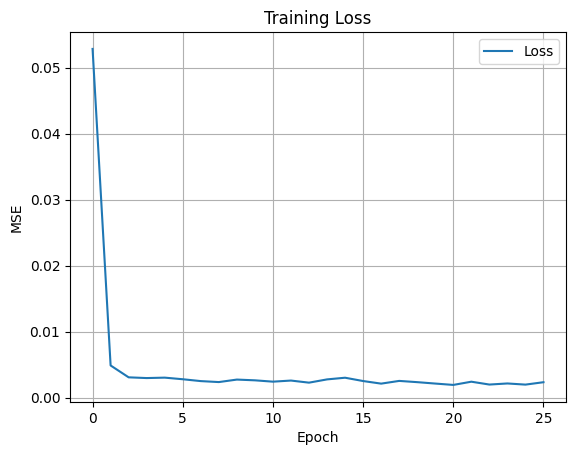

In [ ]:
# 📈 BTC Price Forecast – Enhanced LSTM Model
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# === SETTINGS ===
CSV_PATH = "btcusd_d.csv"
SEQUENCE_LENGTH = 1500
EPOCHS = 50
BATCH_SIZE = 32

# === Load & preprocess data ===
df = pd.read_csv(CSV_PATH)
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df = df.dropna(subset=['Data'])

prices = df['Zamkniecie'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(prices)

# === Create sequences ===
X, y = [], []
for i in range(SEQUENCE_LENGTH, len(scaled)):
    X.append(scaled[i-SEQUENCE_LENGTH:i, 0])
    y.append(scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# === Define model ===
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQUENCE_LENGTH, 1)),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


# === EarlyStopping Callback ===
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# === Train model ===
history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stop])


# === Save model ===
model.save("model_v2_lstm.h5")

# === Plot training loss ===
plt.plot(history.history['loss'], label="Loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
files.download("model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>